In [1]:
import pandas as pd
import pickle
import seaborn as sns

In [3]:
df = pickle.load(open( '../00_data/cleaned/predictions.pkl','rb') )
xmlsaetze = pickle.load(open( '../00_data/cleaned/xmlsaetze.pkl','rb') )
#xmlsaetze = xmlsaetze[['UserID','UebungsID','SatzID','MehrfachFalsch','Datum']]

In [4]:
t = xmlsaetze.groupby(['UserID','UebungsID','SatzID']).agg({'ID':'count'})
d = t.loc[t.ID>1]
f = d.reset_index()
f

,UserID,UebungsID,SatzID,ID
0,186923,30178074,882,2
1,186923,30178074,9992529,2
2,186923,30178074,9992530,2
3,186923,30178121,873,3
4,186923,30178121,878,3
...,...,...,...,...
173564,1064116,30716884,3904,2
173565,1064116,30716885,218,3
173566,1064116,30716885,224,3
173567,1064116,30716886,3893,3


In [5]:
xmlsaetze = xmlsaetze.loc[xmlsaetze.MehrfachFalsch >0]
xmlsaetze

,ID,UserID,UebungsID,UserAttribut,Testart,Testposition,SatzID,Erstloesung,Schussel,KorrekturBenutzt,Datum,Erfolg,XMLstring,Loesungsnr,MehrfachFalsch
72799,267404305,933218,29905708,Schüler,GK,training,4082,1,0,1,2022-06-21 00:01:01,0,"<vcn versuchsnr=""0""><in ii=""0""><ia art=""GK""><u...","[0, 0]",1
72815,267404321,933218,29905708,Schüler,GK,training,4091,1,0,1,2022-06-21 00:01:48,0,"<vcn versuchsnr=""0""><in ii=""0""><ia art=""GK""><u...","[0, 0]",1
72943,267404449,958267,29896434,Schüler,GK,training,2703,1,0,0,2022-06-21 00:11:33,0,"<vcn versuchsnr=""0""><in ii=""0""><ia art=""GK""><u...","[0, 0]",1
72973,267404479,974985,29905241,Schüler,GK,training,384,1,0,1,2022-06-21 00:13:06,0,"<vcn versuchsnr=""0""><in ii=""0""><ia art=""GK""><u...","[0, 0]",1
73058,267404564,958267,29896436,Schüler,GK,training,4083,1,0,0,2022-06-21 00:21:45,0,"<vcn versuchsnr=""0""><in ii=""0""><ia art=""GK""><u...","[0, 0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980932,272312472,1031479,30600395,Schüler,GK,training,3955,1,0,1,2022-10-30 23:51:21,0,"<vcn versuchsnr=""0""><in ii=""0""><ia art=""GK""><u...","[0, 0]",1
4980945,272312485,1057672,30584684,Schüler,GK,training,9991756,1,0,0,2022-10-30 23:51:58,0,"OK<vcn versuchsnr=""0""><in ii=""0""><ia art=""GK"">...","[0, 0]",1
4980952,272312492,1031479,30600395,Schüler,GK,version,3971,1,0,1,2022-10-30 23:52:31,0,"<vcn versuchsnr=""0""><in ii=""0""><ia art=""GK""><u...","[0, 0]",1
4980985,272312525,1057672,30584684,Schüler,GK,training,9991774,1,0,0,2022-10-30 23:54:00,0,"<vcn versuchsnr=""0""><in ii=""0""><ia art=""GK""><u...","[0, 0, 0, 0, 0]",4


<AxesSubplot:xlabel='prediction', ylabel='count'>

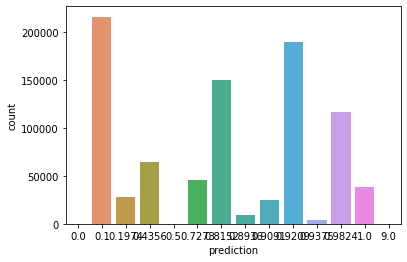

In [6]:
sns.countplot(x=df["prediction"])

In [17]:
t = df.groupby(['UserID','UebungsID','SatzID']).agg({'ID':'count'})
d = t.loc[t.ID>1]
d = d.reset_index()
d

,UserID,UebungsID,SatzID,ID
0,435843,15462147,832,11
1,452752,29737047,586,4
2,452752,29737047,611,5
3,452752,29737047,612,4
4,452754,29872007,885,3
...,...,...,...,...
40193,1035828,30212177,814,5
40194,1035828,30212177,815,9
40195,1035828,30212177,816,4
40196,1035828,30212177,820,2


In [20]:
new = pd.merge(xmlsaetze, d, on=['UserID','UebungsID','SatzID'])
new = new.loc[new.ID != new.MehrfachFalsch]

In [21]:
new

,UserID,UebungsID,SatzID,MehrfachFalsch,Datum,ID
0,974985,29905241,384,1,2022-06-21 00:13:06,5
1,974985,29905241,393,1,2022-06-21 00:31:07,6
2,974985,29905241,391,1,2022-06-21 00:31:35,7
3,974985,29905241,392,1,2022-06-21 00:34:54,5
4,974985,29905241,4255,1,2022-06-21 00:38:27,5
...,...,...,...,...,...,...
33128,923668,29238166,604,9,2022-09-10 22:51:52,13
33129,923668,29238166,604,3,2022-09-10 23:00:31,13
33130,923668,29238166,604,1,2022-09-10 23:09:48,13
33131,923668,29238166,605,5,2022-09-10 22:53:15,16


OLD

In [39]:
#UebungsID SatzID und UserID muss zwar nicht unique sein, aber die sollte ich genauer anschauen
# um herauszufinden, was ich loeschen muss
# ganz oft sind dupletten richtig -> weil eintrag in xmlsaetze (loesungsnr) ergibt mehrere einträge in prediction
t = df.groupby(['UserID','UebungsID','SatzID','modus','interventiongroup', 'Date', 'prediction','Minute']).agg({'ID':'count'})
d = t.loc[t.ID>1]
d = d.reset_index()

In [40]:
funf = d.loc[d['interventiongroup']==5]
intv5 = d.loc[d['modus']=='intv5']

In [41]:
# alle mehrfachen eintrage mit interventiongroup 5 
# manchmal sinnvoll, weil eben wiederholung
# macnhmal gibt es aber auch mehrere identische eintrage bei prediction, die es nicht in xmlsaetze gibt
# die mussen in der analyse nicht berücksichtigt werden
# dafür muss xmlsaetze loesungsnr gecheckt werden -> wenn es da mehrere eintrage gibt (0 0 0) 
# dann gab es auch mehrere predictions
# bevor das gemacht werden kann, mussen bei den predictions überall plus 2 stunden gerechnet werden
funf

,UserID,UebungsID,SatzID,modus,interventiongroup,Date,prediction,Minute,ID
3,452752,29737047,586,version,5,2022-06-23,0.9824,23,2
4,452752,29737047,611,version,5,2022-06-23,0.9824,25,2
5,452752,29737047,612,training,5,2022-06-23,0.8152,3,3
8,452763,29737123,585,training,5,2022-06-27,0.8152,20,2
75,504720,29872256,9992993,training,5,2022-06-22,0.8152,29,2
...,...,...,...,...,...,...,...,...,...
26821,1035418,30205840,895,training,5,2022-09-09,0.9209,11,2
26822,1035418,30205840,895,training,5,2022-09-09,0.9209,12,2
26823,1035418,30205843,2686,training,5,2022-09-09,0.9209,40,3
26824,1035418,30205845,139,training,5,2022-09-09,0.9209,40,2


In [42]:
#modus intv5 ist hard gecoded und bedeutet nichts, dieser text kommt bei allen interventionen 2-4
# dafür muss xmlsaetze loesungsnr gecheckt werden -> wenn es da mehrere eintrage gibt (0 0 0) 
# dann gab es auch mehrere predictions
intv5

,UserID,UebungsID,SatzID,modus,interventiongroup,Date,prediction,Minute,ID
0,435843,15462147,832,intv5,4,2022-06-21,0.1000,5,2
1,435843,15462147,832,intv5,4,2022-06-21,0.1000,6,2
2,435843,15462147,832,intv5,4,2022-06-21,0.1000,51,2
6,452754,29872008,9991859,intv5,3,2022-06-23,0.1000,59,2
7,452754,29872008,9991861,intv5,3,2022-06-23,0.1000,1,2
...,...,...,...,...,...,...,...,...,...
26847,1035828,30212177,813,intv5,2,2022-09-09,0.1000,50,2
26848,1035828,30212177,813,intv5,2,2022-09-10,0.9824,27,2
26849,1035828,30212177,815,intv5,2,2022-09-10,0.1000,38,2
26850,1035828,30212177,815,intv5,2,2022-09-10,0.1000,39,2


In [43]:
# intv5 und interventiongroup 5 stimmen nicht überein, weil hardgecoded -> richtig so
intv5AND5 = intv5.loc[intv5['interventiongroup']==5]
intv5AND5
bothANDintv5 = funf.loc[funf['modus']=='intv5']
bothANDintv5

,UserID,UebungsID,SatzID,modus,interventiongroup,Date,prediction,Minute,ID


Genauere Betrachtung von Records, die nur einmal vorkommen

In [45]:
einmalige = t.loc[t.ID==1]
einmalige = einmalige.reset_index()

In [46]:
einmalige

,UserID,UebungsID,SatzID,modus,interventiongroup,Date,prediction,Minute,ID
0,186923,30178061,9992528,training,6,2022-09-06,0.9209,59,1
1,186923,30178061,9992536,training,6,2022-09-06,0.9209,58,1
2,186923,30178072,9992527,training,6,2022-09-06,0.9209,0,1
3,186923,30178074,873,training,6,2022-09-06,0.9209,2,1
4,186923,30178074,882,training,6,2022-09-06,0.8152,4,1
...,...,...,...,...,...,...,...,...,...
230827,1035828,30212177,817,intv5,2,2022-09-10,0.9209,36,1
230828,1035828,30212177,820,intv5,2,2022-09-10,0.1000,36,1
230829,1035828,30212177,820,intv5,2,2022-09-10,0.8152,36,1
230830,1035828,30212177,821,intv5,2,2022-09-10,0.8152,36,1


In [37]:
e = einmalige.groupby(['interventiongroup'])['ID'].count()
e

interventiongroup
2    17315
3    20956
4    18136
5    27815
6    23391
Name: ID, dtype: int64